In [ ]:
# re-launch Jupyter lab as: jupyter lab --NotebookApp.iopub_data_rate_limit=1.0e10 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
import random
from matplotlib import rc, animation
from IPython import display

In [2]:
from time import time
def runtime(t0):
    dt = time() - t0
    if dt < 60:
        message = f'{dt:.0f} sec.'
    elif dt < 3600:
        message = f'{dt/60:.0f} min.'
    else:
        h = int(dt//3600)
        m = int((dt%3600) / 60)
        message = f'{h} h. {m} min.'
    print(message)

In [3]:
def wave(x, t, k, w, A=1):
    return A * np.cos(k*x - w*t)

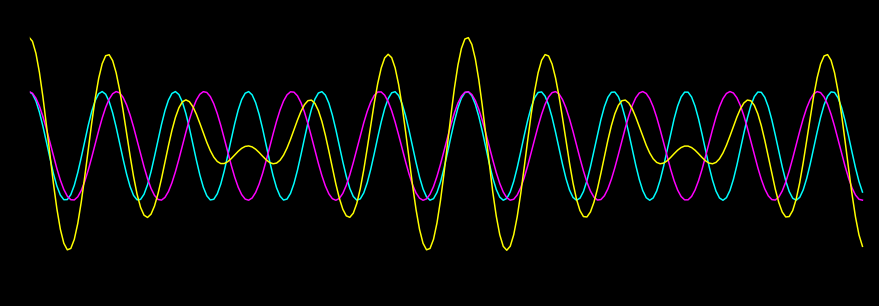

In [4]:
xmin, xmax = 0, 12
ymax = 2.5
fig = plt.figure(figsize=(15, 5))
fig.patch.set_facecolor('black')
ax = plt.axes(xlim=(xmin, xmax), ylim=(-ymax, ymax))
x = np.arange(xmin, xmax, 0.05)
k1, w1 = 6., 2.5
k2, w2 = 5., 2.3
y1 = wave(x, 0, k=k1, w=w1)
y2 = wave(x, 0, k=k2, w=w2)
ax.plot(x, y1, color='cyan')
ax.plot(x, y2, color='magenta')
ax.plot(x, y1+y2, color='yellow')
ax.set_facecolor('black')

# Wave 1

In [10]:
t0 = time()
# figure setup
xmin, xmax = 0, 12
ymax = 2.5
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(xlim=(xmin, xmax), ylim=(-ymax, ymax))
fig.patch.set_facecolor('black')
line1, = ax.plot([], [], lw=2, color='cyan')
line2, = ax.plot([], [], lw=2, color='magenta')
line3, = ax.plot([], [], lw=2, color='yellow')
line4, = ax.plot([], [], lw=1, color='grey')
line5, = ax.plot([], [], lw=1, color='grey')
# surfers
surfer1, = ax.plot([], [], color='cyan', marker='o', alpha=.7, linewidth=2, markersize=12)
surfer2, = ax.plot([], [], color='magenta', marker='o', alpha=.7, linewidth=2, markersize=12)
ax.set_facecolor('black')  # black plot bkgn

x = np.arange(xmin, xmax, 0.05)
# ax.set_xlabel('Distance')
# ax.set_ylabel('Amplitude')

# wave 1
k1, w1, A1 = 6., 2.5, 1
c1 = w1 / k1

# wave 2
k2, w2, A2 = 5., 2.3, A1
c2 = w2 / k2

# init
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    return line1, line2, line3, line4, line5, \
           surfer1, surfer2

# animation
def animate(i):
    t = i * 0.1
    
    y1 = wave(x, t, k=k1, w=w1)
    y2 = wave(x, t, k=k2, w=w2)
    y3 = wave(x, t, k=(k2-k1)/2, w=(w2-w1)/2, A=A1+A2)
    
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(x, y1+y2)
    line4.set_data(x, y3)
    line5.set_data(x,-y3)
    
    surfer1.set_data(c1*t, A1)
    return line1, line2, line3, line4, line5,\
           surfer1, surfer2

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=60, blit=True)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
runtime(t0)

21 sec.


In [15]:
t0 = time()
ani.save('animations/waves2.gif', writer = 'imagemagick', 
         savefig_kwargs={'facecolor':'black'})  # this will save the GIF with black canvas
runtime(t0)
# ~3 min

3 min.


In [6]:
t0 = time()
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animations/waves.mp4', writer=writer)
runtime(t0)
# ~30 sec

27 sec.
